# **Stock Price Prediction using Stacked LSTM-Task-2**
LGMVIP DATA SCIENCE INTERNSHIP

Here we will be reading some basic libraries

In [94]:
import numpy as np
import pandas as pd


Read dataset which was given <br> 
Link- "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"


In [95]:
dataset=pd.read_csv("/Users/nikhil/Documents/LGMVIP data science Internship/Stock Market Prediction Stacked LSTM/NSE-TATAGLOBAL.csv")
dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [96]:
dataset.shape

(2035, 8)

In [97]:
dataset.isnull().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [98]:
dataframe=dataset.reset_index()['Close']

# dataset['Date']

In [99]:
dataframe

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [100]:
dataframe.shape

(2035,)

In [101]:
import matplotlib.pyplot as plt

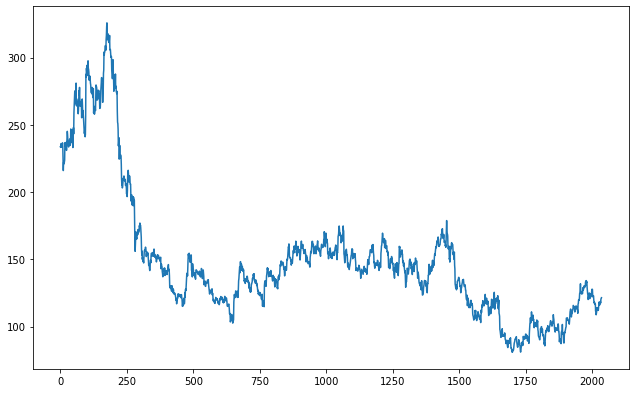

In [102]:
plt.figure(figsize=(16/1.5,10/1.5))
plt.plot(dataframe,)

Feature scaling for this data , we are using Standard Scaler her, as we see values are so near by. 

In [103]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(dataframe).reshape(-1,1))
df2.shape

(2035, 1)

In [104]:
df2

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:], df2[training_size:len(df2),:1]

In [107]:
# X_train,X_test= train_test_split(df2,test_size=0.35,random_state=10)

In [108]:
training_size,test_size

(1322, 713)

In [109]:
# print(training_size.shape)
# test_size.shape

Function to split datasel into X_train,Y_train, X_test,_Y_test

In [110]:
def x_y_data(data,timestep=1):
      leng=len(data)
      X=[]
      Y=[]
      for length in range(0, leng-timestep-1) :
            X.append(data[length:(length+timestep),0])
            Y.append(data[length+1,0])
      return np.array(X),np.array(Y)

In [111]:
timestep=100
X_train,Y_train=x_y_data(train_data,timestep)
X_test,Y_test=x_y_data(test_data,timestep)

In [112]:
# just for explorig what we got after splitting data set 
m=pd.DataFrame(Y_train)
n=pd.DataFrame(X_test)
print(m.shape)
print(n.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1221, 1)
(612, 100)
(1221, 100)
(612, 100)
(1221,)
(612,)


Now as we have got our splitted dataset<br> lets go to LSTM model for training

In [113]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [114]:
X_train.shape

(1221, 100, 1)

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [116]:
model=Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer="adam")

In [117]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=200,batch_size=15,verbose=1)

Epoch 1/200
82/82 [==============================] - 2s 22ms/step - loss: 0.3031 - val_loss: 0.0541
Epoch 2/200
82/82 [==============================] - 2s 21ms/step - loss: 0.0332 - val_loss: 0.0480
Epoch 3/200
82/82 [==============================] - 2s 21ms/step - loss: 0.0044 - val_loss: 0.2415
Epoch 4/200
82/82 [==============================] - 2s 21ms/step - loss: 0.0012 - val_loss: 0.3306
Epoch 5/200
82/82 [==============================] - 2s 22ms/step - loss: 0.0047 - val_loss: 0.0025
Epoch 6/200
82/82 [==============================] - 2s 22ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 7/200
82/82 [==============================] - 2s 22ms/step - loss: 0.0028 - val_loss: 0.0092
Epoch 8/200
82/82 [==============================] - 2s 21ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 9/200
82/82 [==============================] - 2s 21ms/step - loss: 0.0022 - val_loss: 0.0059
Epoch 10/200
82/82 [==============================] - 2s 21ms/step - loss: 0.0012 - val_loss: 0.0019

In [134]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [135]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [136]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

177.67501969421855

In [137]:
math.sqrt(mean_squared_error(Y_test, test_predict))

128.15113205044105

In [138]:
### Plotting

look_back=100
trainPredictPlot= np.empty_like(df2)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict


testPredictPlot=np.empty_like(df2)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1,:]= test_predict

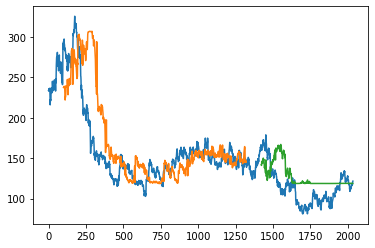

In [139]:
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()